In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Define the path to the data
base_path = '/ZPOOL/data/projects/rf1-sra-data/derivatives/mreye_echo-2/bidsmreye/'
subject = '10369'
tasks = ['doors', 'socialdoors', 'sharedreward', 'ugr', 'trust']
runs = ['1', '2']

# Exclude these runs; right now the script only works if you specify all of the missing runs here
exclude_runs = ['doors_run-2', 'socialdoors_run-2'] #, 'trust_run-1']

def read_tsv_files(sub):
    displacements = {}
    std_devs = {}
    for task in tasks:
        for run in runs:
            task_run_key = f'{task}_run-{run}'
            if task_run_key in exclude_runs:
                continue
            file_path = os.path.join(base_path, f'sub-{sub}', 'func',
                                    f'sub-{sub}_task-{task}_run-{run}_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv')
            if os.path.exists(file_path):
                #print(f"Loading file: {file_path}")
                data = pd.read_csv(file_path, sep='\t')
                #print(data.head())
                if 'displacement' in data.columns:
                    displacement = np.nanmedian(data['displacement'])
                    std_dev = np.std(data['displacement'])
                    #print(f"Displacement for {task_run_key}: {displacement}")
                    displacements[task_run_key] = displacement
                    std_devs[task_run_key] = std_dev
                else:
                    print(f"'displacement' column not found in {file_path}")
                    displacements[task_run_key] = np.nan
                    std_devs[task_run_key] = np.nan
            else:
                print(f"File not found: {file_path}")
                displacements[task_run_key] = np.nan
                std_devs[task_run_key] = np.nan
    return displacements, std_devs

# Get displacement and standard deviations for the subject
subject_displacements, subject_std_devs = read_tsv_files(subject)
#print(subject_displacements)
#print(subject_std_devs)

# Filter out NaN values for plotting
filtered_displacements = {k: v for k, v in subject_displacements.items() if not np.isnan(v)}
filtered_std_devs = {k: subject_std_devs[k] for k in filtered_displacements.keys()}

# Plot the variances
keys = list(subject_displacements.keys())
values = [filtered_displacements[key] for key in keys]
errors = [filtered_std_devs[key] for key in keys]

plt.figure(figsize=(10, 6))
plt.bar(keys, values, yerr=errors, capsize=5)
plt.xlabel('Task and Run')
plt.ylabel('Average Displacement')
plt.title(f'Average Displacement for sub-{subject}')
plt.xticks(rotation=45)
plt.show()             

File not found: /ZPOOL/data/projects/rf1-sra-data/derivatives/mreye_echo-2/bidsmreye/sub-10369/func/sub-10369_task-trust_run-2_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv


KeyError: 'trust_run-2'

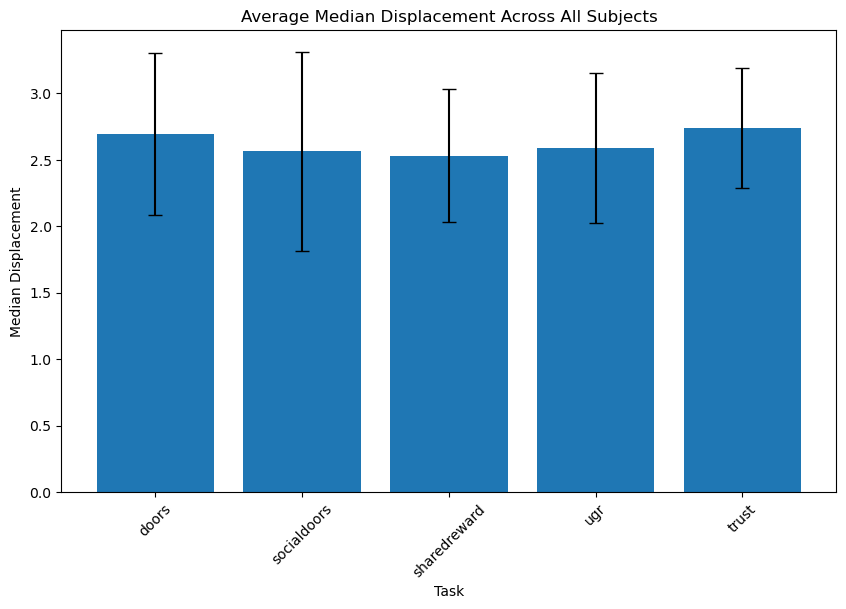

In [13]:
# Define the path to the data 
base_path = '/ZPOOL/data/projects/rf1-sra-data/derivatives/mreye_echo-2/bidsmreye/'
sublist_path = '/ZPOOL/data/projects/rf1-sra-data/code/sublist_all.txt'
tasks = ['doors', 'socialdoors', 'sharedreward', 'ugr', 'trust'] 
runs = ['1', '2'] 

# Exclude these runs 
exclude_runs = ['doors_run-2', 'socialdoors_run-2'] 

with open (sublist_path, 'r') as file:
    subjects = file.read().splitlines()

def read_tsv_files(sub): 
    averages = {}
    for task in tasks: 
        task_averages = []
        for run in runs: 
            task_run_key = f'{task}_run-{run}'
            if task_run_key in exclude_runs: 
                continue 
            file_path = os.path.join(base_path, f'sub-{sub}', 'func',
                                     f'sub-{sub}_task-{task}_run-{run}_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path, sep='\t')
                if 'displacement' in data.columns:
                    average = np.nanmedian(data['displacement'])
                    task_averages.append(average)
                else:
                    task_averages.append(np.nan)
            else:
                task_averages.append(np.nan)
        
        # Average variances if there are multiple runs
        if len(task_averages) > 1:
            task_averages = [v for v in task_averages if not np.isnan(v)]
            if task_averages:
                avg_average = np.mean(task_averages)
            else: avg_average = np.nan
        else:
            avg_average = task_averages[0] if task_averages else np.nan
        averages[task] = avg_average
    return averages 

def aggregate_averages(subjects):
    all_averages = {task: [] for task in tasks}
    for sub in subjects:
        subject_averages = read_tsv_files(sub)
        for task, average in subject_averages.items():
            all_averages[task].append(average)
    return all_averages 

# Get averages for all subjects 
all_subject_averages = aggregate_averages(subjects) 

# Calculate average average for each task across all subjects
average_averages = {task: np.nanmean(all_subject_averages[task]) for task in tasks}
std_devs = {task: np.nanstd(all_subject_averages[task]) for task in tasks}

# Plot the average averages 
keys = list(average_averages.keys()) 
values = [average_averages[key] for key in keys] 
errors = [std_devs[key] for key in keys]

plt.figure(figsize=(10, 6)) 
plt.bar(keys, values, yerr=errors, capsize=5) 
plt.xlabel('Task') 
plt.ylabel('Median Displacement') 
plt.title('Average Median Displacement Across All Subjects') 
plt.xticks(rotation=45) 
plt.show()

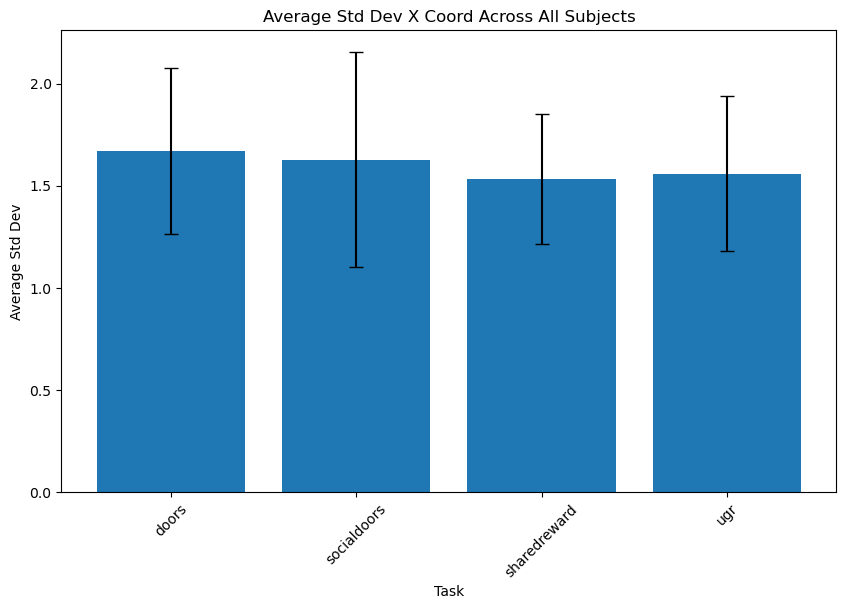

In [6]:
# Define the path to the data 
#base_path = '/ZPOOL/data/projects/istart-data/derivatives/mreye/bidsmreye/'
#sublist_path = '/ZPOOL/data/projects/istart-data/code/sublist_all.txt'
#tasks = ['doors', 'socialdoors', 'sharedreward', 'mid', 'ugdg'] 
#runs = ['1', '2'] 

# Exclude these runs 
exclude_runs = ['doors_run-2', 'socialdoors_run-2'] 

with open (sublist_path, 'r') as file:
    subjects = file.read().splitlines()

def read_tsv_files(sub): 
    std_devs = {}
    for task in tasks: 
        task_std_devs = []
        for run in runs: 
            task_run_key = f'{task}_run-{run}'
            if task_run_key in exclude_runs: 
                continue 
            file_path = os.path.join(base_path, f'sub-{sub}', 'func',
                                     f'sub-{sub}_task-{task}_run-{run}_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path, sep='\t')
                if 'eye1_x_coordinate' in data.columns:
                    std_dev = np.std(data['eye1_x_coordinate'])
                    task_std_devs.append(std_dev)
                else:
                    task_std_devs.append(np.nan)
            else:
                task_std_devs.append(np.nan)
        
        # Average std devs if there are multiple runs
        if len(task_std_devs) > 1:
            task_std_devs = [v for v in task_std_devs if not np.isnan(v)]
            if task_std_devs:
                avg_std_dev = np.mean(task_std_devs)
            else: avg_stf_dev = np.nan
        else:
            avg_std_dev = task_std_devs[0] if task_std_devs else np.nan
        std_devs[task] = avg_std_dev
    return std_devs 

def aggregate_std_devs(subjects):
    all_std_devs = {task: [] for task in tasks}
    for sub in subjects:
        subject_std_devs = read_tsv_files(sub)
        for task, std_dev in subject_std_devs.items():
            all_std_devs[task].append(std_dev)
    return all_std_devs 

# Get std dev for all subjects 
all_subject_std_devs = aggregate_std_devs(subjects) 

# Calculate average average for each task across all subjects
average_std_devs = {task: np.nanmean(all_subject_std_devs[task]) for task in tasks}
rstd_devs = {task: np.nanstd(all_subject_std_devs[task]) for task in tasks}

# Plot the average averages 
keys = list(average_std_devs.keys()) 
values = [average_std_devs[key] for key in keys] 
errors = [rstd_devs[key] for key in keys]

plt.figure(figsize=(10, 6)) 
plt.bar(keys, values, yerr=errors, capsize=5) 
plt.xlabel('Task') 
plt.ylabel('Average Std Dev') 
plt.title('Average Std Dev X Coord Across All Subjects') 
plt.xticks(rotation=45) 
plt.show()

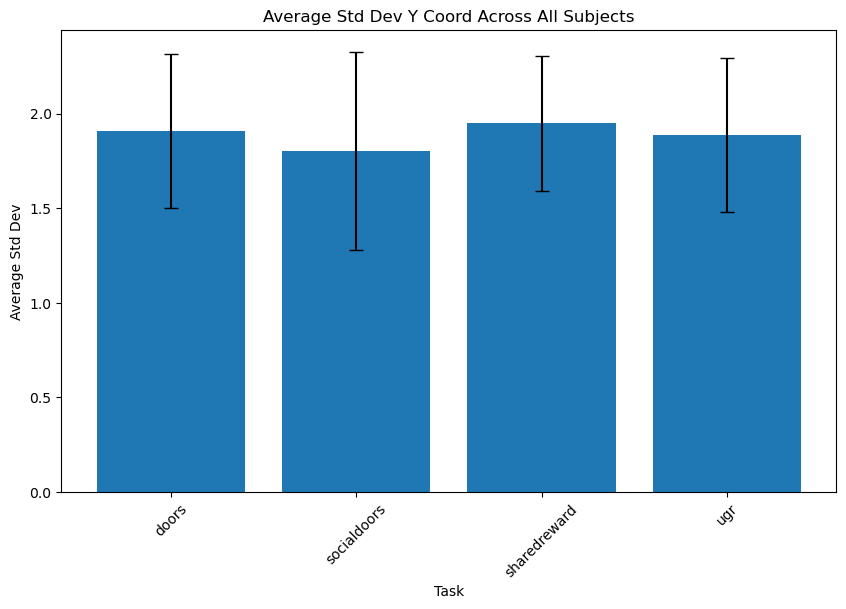

In [7]:
# Define the path to the data 
#base_path = '/ZPOOL/data/projects/istart-data/derivatives/mreye/bidsmreye/'
#sublist_path = '/ZPOOL/data/projects/istart-data/code/sublist_all.txt'
#tasks = ['doors', 'socialdoors', 'sharedreward', 'mid', 'ugdg'] 
#runs = ['1', '2'] 

# Exclude these runs 
exclude_runs = ['doors_run-2', 'socialdoors_run-2'] 

with open (sublist_path, 'r') as file:
    subjects = file.read().splitlines()

def read_tsv_files(sub): 
    std_devs = {}
    for task in tasks: 
        task_std_devs = []
        for run in runs: 
            task_run_key = f'{task}_run-{run}'
            if task_run_key in exclude_runs: 
                continue 
            file_path = os.path.join(base_path, f'sub-{sub}', 'func',
                                     f'sub-{sub}_task-{task}_run-{run}_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path, sep='\t')
                if 'eye1_y_coordinate' in data.columns:
                    std_dev = np.std(data['eye1_y_coordinate'])
                    task_std_devs.append(std_dev)
                else:
                    task_std_devs.append(np.nan)
            else:
                task_std_devs.append(np.nan)
        
        # Average std devs if there are multiple runs
        if len(task_std_devs) > 1:
            task_std_devs = [v for v in task_std_devs if not np.isnan(v)]
            if task_std_devs:
                avg_std_dev = np.mean(task_std_devs)
            else: avg_stf_dev = np.nan
        else:
            avg_std_dev = task_std_devs[0] if task_std_devs else np.nan
        std_devs[task] = avg_std_dev
    return std_devs 

def aggregate_std_devs(subjects):
    all_std_devs = {task: [] for task in tasks}
    for sub in subjects:
        subject_std_devs = read_tsv_files(sub)
        for task, std_dev in subject_std_devs.items():
            all_std_devs[task].append(std_dev)
    return all_std_devs 

# Get std dev for all subjects 
all_subject_std_devs = aggregate_std_devs(subjects) 

# Calculate average average for each task across all subjects
average_std_devs = {task: np.nanmean(all_subject_std_devs[task]) for task in tasks}
rstd_devs = {task: np.nanstd(all_subject_std_devs[task]) for task in tasks}

# Plot the average averages 
keys = list(average_std_devs.keys()) 
values = [average_std_devs[key] for key in keys] 
errors = [rstd_devs[key] for key in keys]

plt.figure(figsize=(10, 6)) 
plt.bar(keys, values, yerr=errors, capsize=5) 
plt.xlabel('Task') 
plt.ylabel('Average Std Dev') 
plt.title('Average Std Dev Y Coord Across All Subjects') 
plt.xticks(rotation=45) 
plt.show()

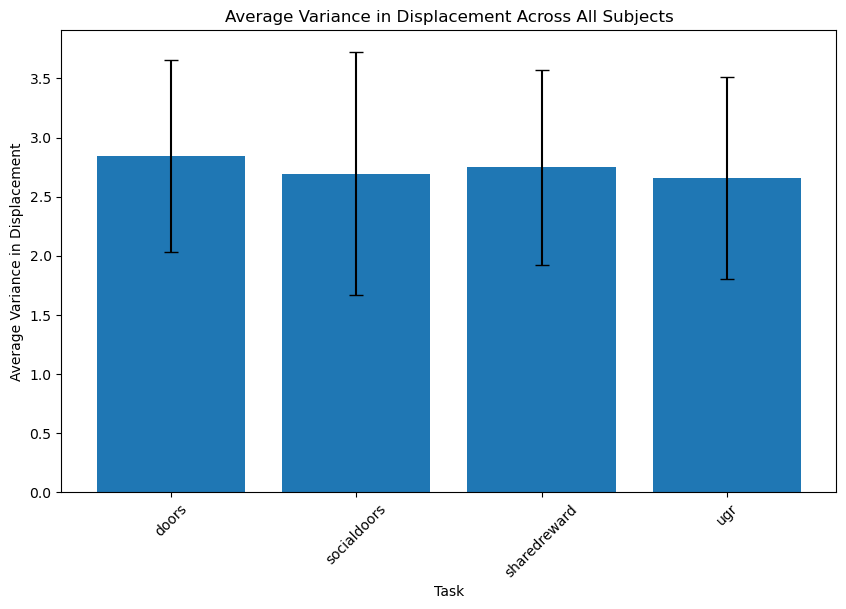

In [8]:
# Define the path to the data 
#base_path = '/ZPOOL/data/projects/istart-data/derivatives/mreye/bidsmreye/'
#sublist_path = '/ZPOOL/data/projects/istart-data/code/sublist_all.txt'
#tasks = ['doors', 'socialdoors', 'sharedreward', 'mid', 'ugdg'] 
#runs = ['1', '2'] 

# Exclude these runs 
exclude_runs = ['doors_run-2', 'socialdoors_run-2'] 

with open (sublist_path, 'r') as file:
    subjects = file.read().splitlines()

def read_tsv_files(sub): 
    variances = {}
    for task in tasks: 
        task_variances = []
        for run in runs: 
            task_run_key = f'{task}_run-{run}'
            if task_run_key in exclude_runs: 
                continue 
            file_path = os.path.join(base_path, f'sub-{sub}', 'func',
                                     f'sub-{sub}_task-{task}_run-{run}_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path, sep='\t')
                if 'displacement' in data.columns:
                    variance = np.var(data['displacement'])
                    task_variances.append(variance)
                else:
                    task_variances.append(np.nan)
            else:
                task_variances.append(np.nan)
        
        # Average variances if there are multiple runs
        if len(task_variances) > 1:
            task_variances = [v for v in task_variances if not np.isnan(v)]
            if task_variances:
                avg_variance = np.mean(task_variances)
            else: avg_variance = np.nan
        else:
            avg_variance = task_variances[0] if task_variances else np.nan
        variances[task] = avg_variance
    return variances 

def aggregate_variances(subjects):
    all_variances = {task: [] for task in tasks}
    for sub in subjects:
        subject_variances = read_tsv_files(sub)
        for task, variance in subject_variances.items():
            all_variances[task].append(variance)
    return all_variances 

# Get variances for all subjects 
all_subject_variances = aggregate_variances(subjects) 

# Calculate average variance for each task across all subjects
average_variances = {task: np.nanmean(all_subject_variances[task]) for task in tasks}
std_devs = {task: np.nanstd(all_subject_variances[task]) for task in tasks}

# Plot the average variances 
keys = list(average_variances.keys()) 
values = [average_variances[key] for key in keys] 
errors = [std_devs[key] for key in keys]

plt.figure(figsize=(10, 6)) 
plt.bar(keys, values, yerr=errors, capsize=5) 
plt.xlabel('Task') 
plt.ylabel('Average Variance in Displacement') 
plt.title('Average Variance in Displacement Across All Subjects') 
plt.xticks(rotation=45) 
plt.show()

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.stats import pearsonr

In [20]:
# Define paths 
displacement_path = "/ZPOOL/data/projects/rf1-sra-data/derivatives/mreye_echo-2/bidsmreye/sub-{sub}/func/" 
ppi_signal_path = "/ZPOOL/data/projects/rf1-eyeballs/derivatives/imaging_plots/{task}/"

# Define variables 
tasks = ['doors', 'socialdoors', 'sharedreward', 'ugr'] 
hemispheres = ['left', 'right'] 
cb_path = '/ZPOOL/data/projects/rf1-eyeballs/code/CB_ROIs.txt'
with open (cb_path, 'r') as file:
    cb_regions = file.read().splitlines()
sublist_path = '/ZPOOL/data/projects/rf1-sra-data/code/sublist_all.txt'
with open (sublist_path, 'r') as file:
    subjects = file.read().splitlines()

# Initialize a dataframe to store the results 
results = [] 

for cb in cb_regions: 
    for task in tasks: 
        for hemi in hemispheres: 
            for sub in subjects: 
                displacement_files = glob(displacement_path.format(sub=sub) + f"sub-{sub}_task-{task}_*_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv") 
                
                # Calculate average displacement for this subject and task 
                displacements = [] 
                for file in displacement_files: 
                    df = pd.read_csv(file, sep='\t') 
                    displacements.append(df['displacement'].mean()) 
                avg_displacement = np.nanmean(displacements) 
                    
                # Load PPI signal 
                ppi_file = ppi_signal_path.format(task=task) + f"sub-{sub}_task-{task}_eye-{hemi}_hemi-{hemi}_cb-{cb}.txt"
                if os.path.exists(ppi_file): 
                    ppi_signal = np.loadtxt(ppi_file) 
                    
                    # Store the data 
                    results.append({ 
                        'cb': cb, 
                        'task': task, 
                        'hemi': hemi, 
                        'sub': sub, 
                        'avg_displacement': avg_displacement, 
                        'ppi_signal': ppi_signal 
                    }) 
# Convert results to a DataFrame 
results_df = pd.DataFrame(results)

results_df

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/ZPOOL/data/tools/anaconda/tun46412/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ZPOOL/data/tools

,cb,task,hemi,sub,avg_displacement,ppi_signal
0,IV,doors,left,10640,3.236000,-0.09077465509
1,IV,doors,left,10647,3.383968,-0.02521176962
2,IV,doors,left,10652,3.222036,0.2220803277
3,IV,doors,left,10668,2.831257,0.2425025821
4,IV,doors,left,10690,3.053991,0.1354725926
...,...,...,...,...,...,...
1675,Vermis_IX,socialdoors,right,10857,3.171271,-0.2958926189
1676,Vermis_IX,socialdoors,right,10860,3.559528,-0.0387270945
1677,Vermis_IX,socialdoors,right,10862,3.536677,0.1741053044
1678,Vermis_IX,socialdoors,right,10863,3.693433,0.2980771061


In [21]:
# Function to calculate correlation
def calculate_correlation(group): 
    return pearsonr(group['avg_displacement'], group['ppi_signal'])[0] 

# Group by cerebellum region, task, and hemisphere and calculate correlations 
correlations = results_df.groupby(['cb', 'task', 'hemi']).apply(calculate_correlation).reset_index() 
correlations.columns = ['cb', 'task', 'hemi', 'correlation']

In [22]:
# Calculate mean and standard error of correlations 
mean_se = correlations.groupby(['cb', 'task', 'hemi']).agg(['mean', 'sem']).reset_index() 
mean_se.columns = ['cb', 'task', 'hemi', 'mean_correlation', 'se_correlation']

Plotting data for IV:
           task   hemi  mean_correlation  se_correlation
0         doors   left               0.0             0.0
1         doors  right               0.0             0.0
2   socialdoors   left               0.0             0.0
3   socialdoors  right               0.0             0.0
4  sharedreward   left               0.0             0.0
5  sharedreward  right               0.0             0.0
6           ugr   left               0.0             0.0
7           ugr  right               0.0             0.0


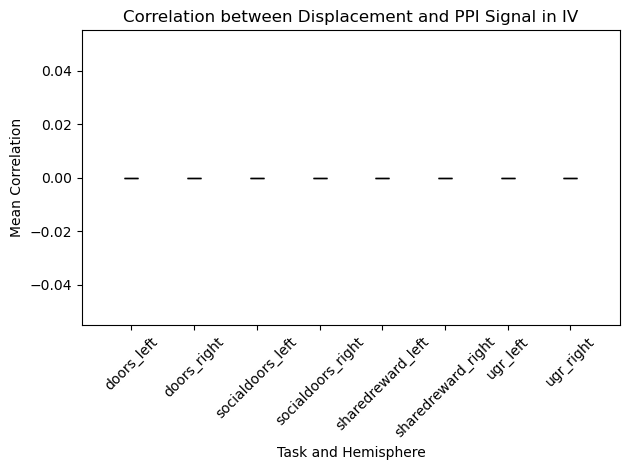

Plotting data for V:
            task   hemi  mean_correlation  se_correlation
8          doors   left               0.0             0.0
9          doors  right               0.0             0.0
10   socialdoors   left               0.0             0.0
11   socialdoors  right               0.0             0.0
12  sharedreward   left               0.0             0.0
13  sharedreward  right               0.0             0.0
14           ugr   left               0.0             0.0
15           ugr  right               0.0             0.0


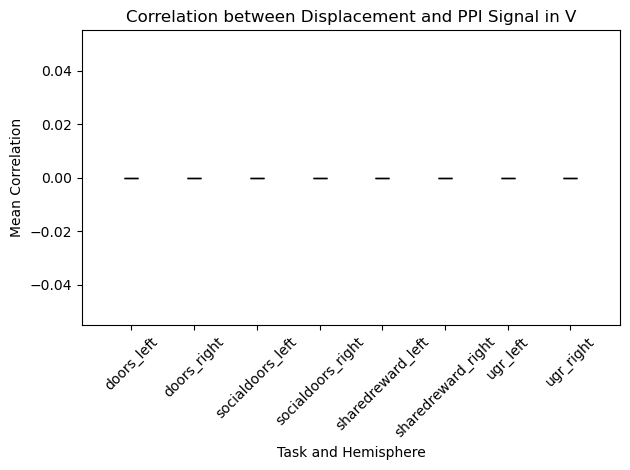

Plotting data for VI:
            task   hemi  mean_correlation  se_correlation
16         doors   left               0.0             0.0
17         doors  right               0.0             0.0
18   socialdoors   left               0.0             0.0
19   socialdoors  right               0.0             0.0
20  sharedreward   left               0.0             0.0
21  sharedreward  right               0.0             0.0
22           ugr   left               0.0             0.0
23           ugr  right               0.0             0.0


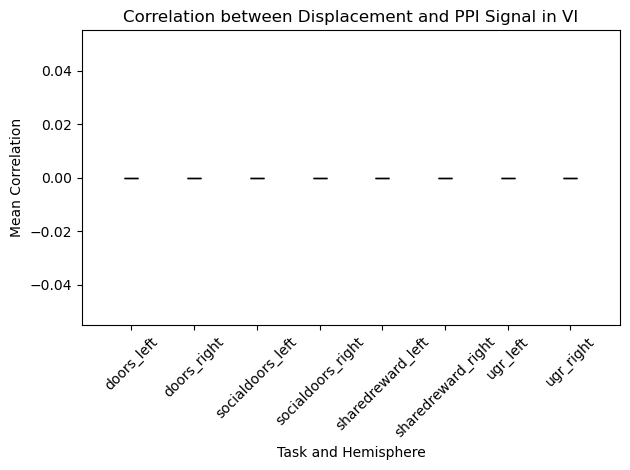

Plotting data for Crus_I:
            task   hemi  mean_correlation  se_correlation
24         doors   left               0.0             0.0
25         doors  right               0.0             0.0
26   socialdoors   left               0.0             0.0
27   socialdoors  right               0.0             0.0
28  sharedreward   left               0.0             0.0
29  sharedreward  right               0.0             0.0
30           ugr   left               0.0             0.0
31           ugr  right               0.0             0.0


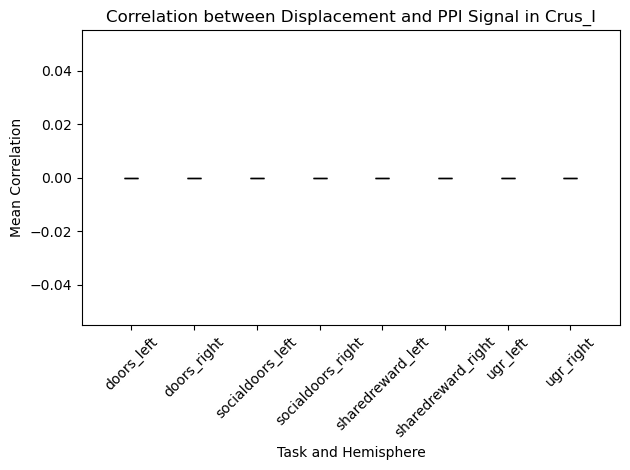

Plotting data for Crus_II:
            task   hemi  mean_correlation  se_correlation
32         doors   left               0.0             0.0
33         doors  right               0.0             0.0
34   socialdoors   left               0.0             0.0
35   socialdoors  right               0.0             0.0
36  sharedreward   left               0.0             0.0
37  sharedreward  right               0.0             0.0
38           ugr   left               0.0             0.0
39           ugr  right               0.0             0.0


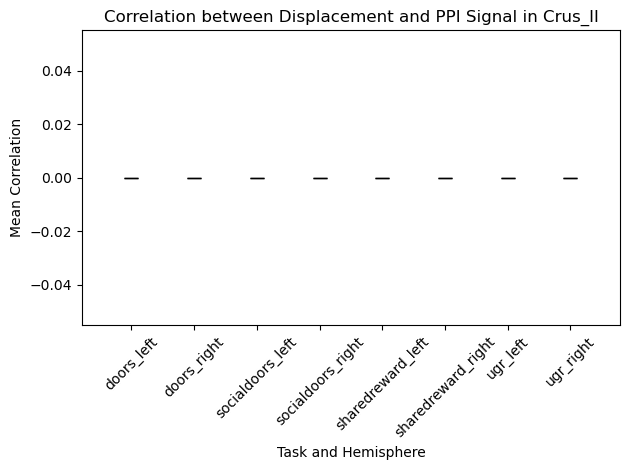

Plotting data for VIIb:
            task   hemi  mean_correlation  se_correlation
40         doors   left               0.0             0.0
41         doors  right               0.0             0.0
42   socialdoors   left               0.0             0.0
43   socialdoors  right               0.0             0.0
44  sharedreward   left               0.0             0.0
45  sharedreward  right               0.0             0.0
46           ugr   left               0.0             0.0
47           ugr  right               0.0             0.0


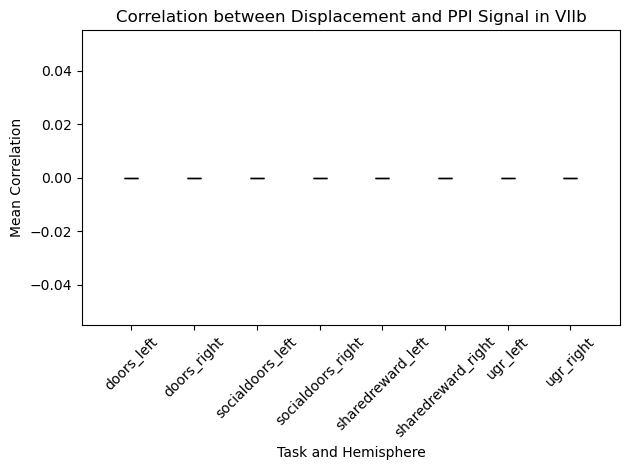

Plotting data for VIIIa:
            task   hemi  mean_correlation  se_correlation
48         doors   left               0.0             0.0
49         doors  right               0.0             0.0
50   socialdoors   left               0.0             0.0
51   socialdoors  right               0.0             0.0
52  sharedreward   left               0.0             0.0
53  sharedreward  right               0.0             0.0
54           ugr   left               0.0             0.0
55           ugr  right               0.0             0.0


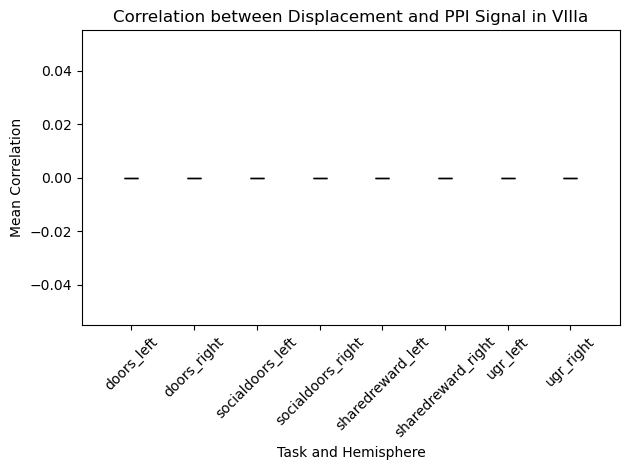

Plotting data for VIIIb:
            task   hemi  mean_correlation  se_correlation
56         doors   left               0.0             0.0
57         doors  right               0.0             0.0
58   socialdoors   left               0.0             0.0
59   socialdoors  right               0.0             0.0
60  sharedreward   left               0.0             0.0
61  sharedreward  right               0.0             0.0
62           ugr   left               0.0             0.0
63           ugr  right               0.0             0.0


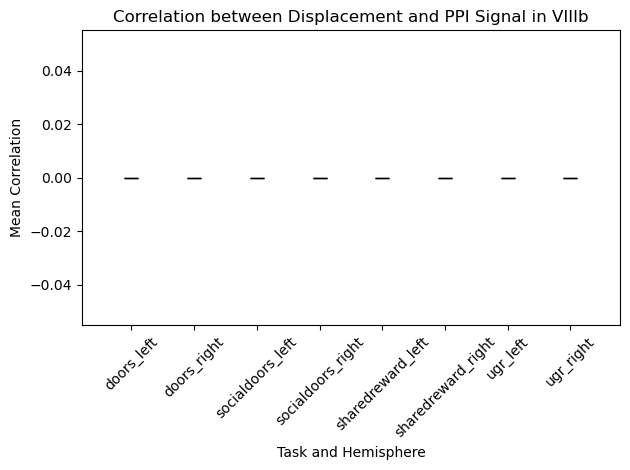

Plotting data for IX:
            task   hemi  mean_correlation  se_correlation
64         doors   left               0.0             0.0
65         doors  right               0.0             0.0
66   socialdoors   left               0.0             0.0
67   socialdoors  right               0.0             0.0
68  sharedreward   left               0.0             0.0
69  sharedreward  right               0.0             0.0
70           ugr   left               0.0             0.0
71           ugr  right               0.0             0.0


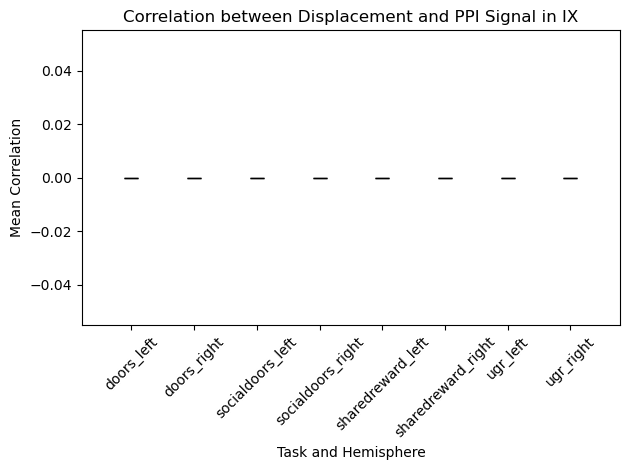

Plotting data for X:
            task   hemi  mean_correlation  se_correlation
72         doors   left               0.0             0.0
73         doors  right               0.0             0.0
74   socialdoors   left               0.0             0.0
75   socialdoors  right               0.0             0.0
76  sharedreward   left               0.0             0.0
77  sharedreward  right               0.0             0.0
78           ugr   left               0.0             0.0
79           ugr  right               0.0             0.0


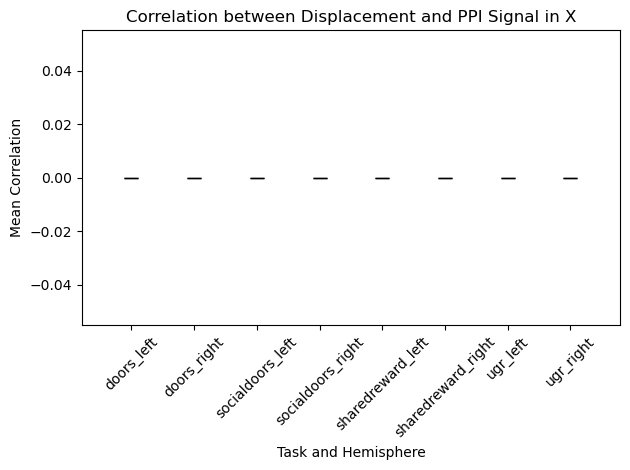

Plotting data for Vermis_VI:
            task   hemi  mean_correlation  se_correlation
80         doors   left               0.0             0.0
81         doors  right               0.0             0.0
82   socialdoors   left               0.0             0.0
83   socialdoors  right               0.0             0.0
84  sharedreward   left               0.0             0.0
85  sharedreward  right               0.0             0.0
86           ugr   left               0.0             0.0
87           ugr  right               0.0             0.0


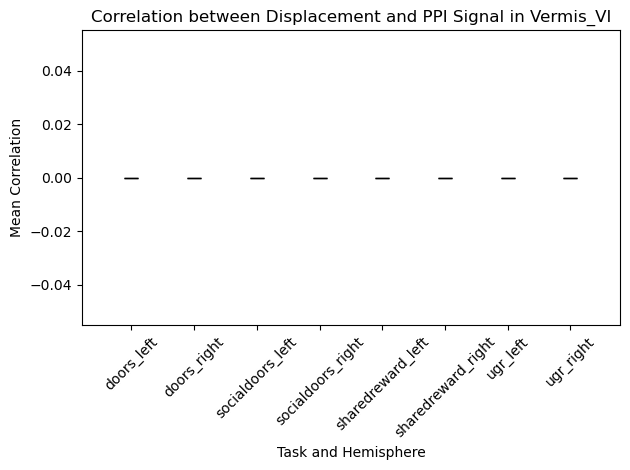

Plotting data for Vermis_VIIIa:
            task   hemi  mean_correlation  se_correlation
88         doors   left               0.0             0.0
89         doors  right               0.0             0.0
90   socialdoors   left               0.0             0.0
91   socialdoors  right               0.0             0.0
92  sharedreward   left               0.0             0.0
93  sharedreward  right               0.0             0.0
94           ugr   left               0.0             0.0
95           ugr  right               0.0             0.0


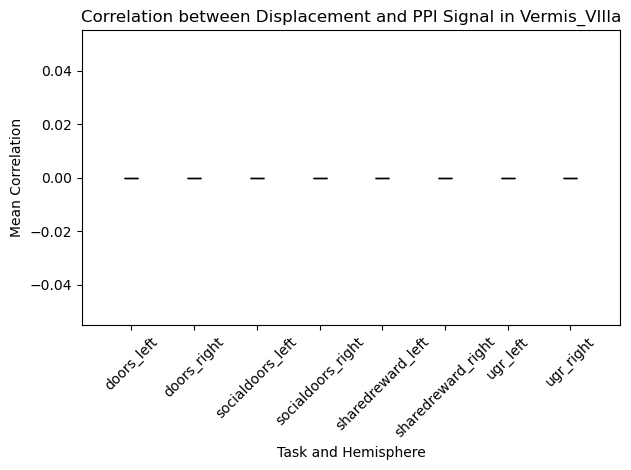

Plotting data for Vermis_VIIIb:
             task   hemi  mean_correlation  se_correlation
96          doors   left               0.0             0.0
97          doors  right               0.0             0.0
98    socialdoors   left               0.0             0.0
99    socialdoors  right               0.0             0.0
100  sharedreward   left               0.0             0.0
101  sharedreward  right               0.0             0.0
102           ugr   left               0.0             0.0
103           ugr  right               0.0             0.0


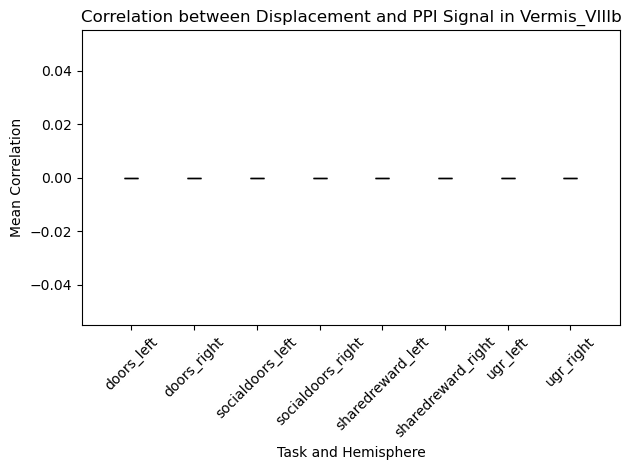

Plotting data for Vermis_IX:
             task   hemi  mean_correlation  se_correlation
104         doors   left               0.0             0.0
105         doors  right               0.0             0.0
106   socialdoors   left               0.0             0.0
107   socialdoors  right               0.0             0.0
108  sharedreward   left               0.0             0.0
109  sharedreward  right               0.0             0.0
110           ugr   left               0.0             0.0
111           ugr  right               0.0             0.0


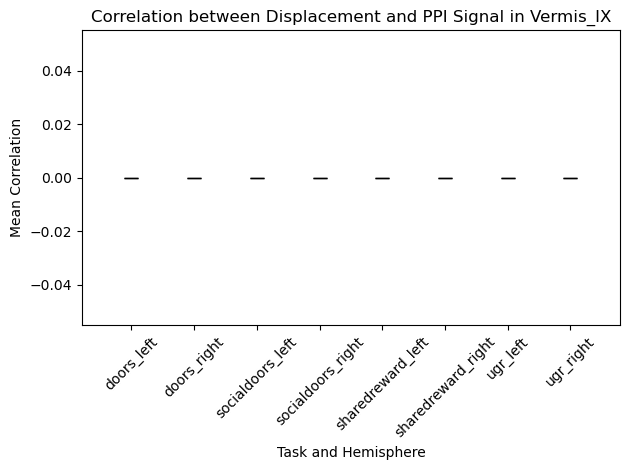

In [29]:
# Initialize a dataframe to store the results
results = []
for cb in cb_regions:
    for task in tasks:
        for hemi in hemispheres:
            for sub in subjects:
                displacement_files = glob(displacement_path.format(sub=sub) + f"sub-{sub}_task-{task}_*_space-MNI152NLin2009cAsym_desc-bidsmreye_eyetrack.tsv")
                # Calculate average displacement for this subject and task
                displacements = []
                for file in displacement_files:
                    df = pd.read_csv(file, sep='\t')
                    displacements.append(df['displacement'].nanmean())
                avg_displacement = np.nanmean(displacements) if displacements else np.nan
                # Load PPI signal
                ppi_file = ppi_signal_path.format(task=task) + f"sub-{sub}_task-{task}_eye-{hemi}_hemi-{hemi}_cb-{cb}.txt"
                if os.path.exists(ppi_file):
                    ppi_signal = np.loadtxt(ppi_file)
                    # Store the data
                    results.append({
                        'cb': cb,
                        'task': task,
                        'hemi': hemi,
                        'sub': sub,
                        'avg_displacement': avg_displacement,
                        'ppi_signal': ppi_signal
                    })
# Convert results to a DataFrame
results_df = pd.DataFrame(results)
# Function to calculate correlation
def calculate_correlation(group):
    valid_data = group.dropna(subset=['avg_displacement', 'ppi_signal'])
    if len(valid_data) > 1:
        return pearsonr(valid_data['avg_displacement'], valid_data['ppi_signal'])[0]
    else:
        return np.nan
# Group by cerebellum region, task, and hemisphere and calculate correlations
correlations = results_df.groupby(['cb', 'task', 'hemi']).apply(calculate_correlation).reset_index()
correlations.columns = ['cb', 'task', 'hemi', 'correlation']
# Calculate mean and standard error of correlations
mean_se = correlations.groupby(['cb', 'task', 'hemi']).agg(['mean', 'sem']).reset_index()
mean_se.columns = ['cb', 'task', 'hemi', 'mean_correlation', 'se_correlation']
# Create a complete structure to hold all combinations
complete_data = pd.MultiIndex.from_product([cb_regions, tasks, hemispheres], names=['cb', 'task', 'hemi']).to_frame(index=False)
complete_data = complete_data.merge(mean_se, on=['cb', 'task', 'hemi'], how='left')
# Ensure no NaN values in mean_correlation and se_correlation before plotting
complete_data['mean_correlation'] = complete_data['mean_correlation'].fillna(0)
complete_data['se_correlation'] = complete_data['se_correlation'].fillna(0)
# Create bar plots
for cb in cb_regions:
    cb_data = complete_data[complete_data['cb'] == cb]
    fig, ax = plt.subplots()
    # Define bar positions
    bar_positions = np.arange(len(tasks) * len(hemispheres))
    # Debugging: Print the data being plotted
    print(f"Plotting data for {cb}:")
    print(cb_data[['task', 'hemi', 'mean_correlation', 'se_correlation']])
    # Create bar plot
    bars = ax.bar(
        bar_positions,
        cb_data['mean_correlation'],
        yerr=cb_data['se_correlation'],
        capsize=5,
        tick_label=[f"{task}_{hemi}" for task in tasks for hemi in hemispheres]
    )
    # Set plot title and labels
    ax.set_title(f"Correlation between Displacement and PPI Signal in {cb}")
    ax.set_xlabel("Task and Hemisphere")
    ax.set_ylabel("Mean Correlation")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Results dataframe:
   cb   task  hemi    sub  avg_displacement      ppi_signal
0  IV  doors  left  10640          3.193355  -0.09077465509
1  IV  doors  left  10647          3.140364  -0.02521176962
2  IV  doors  left  10652          2.951549    0.2220803277
3  IV  doors  left  10668          2.507782    0.2425025821
4  IV  doors  left  10690          2.842280    0.1354725926
Correlations dataframe:
       cb    sub  correlation
0  Crus_I  10640     0.369491
1  Crus_I  10647    -0.519338
2  Crus_I  10652    -0.228334
3  Crus_I  10668    -0.234158
4  Crus_I  10690    -0.166106
Mean and SE dataframe:
        cb  mean_correlation  se_correlation
0   Crus_I         -0.119311        0.082785
1  Crus_II         -0.142577        0.095218
2       IV         -0.166851        0.097728
3       IX         -0.058056        0.103560
4        V         -0.191082        0.092905


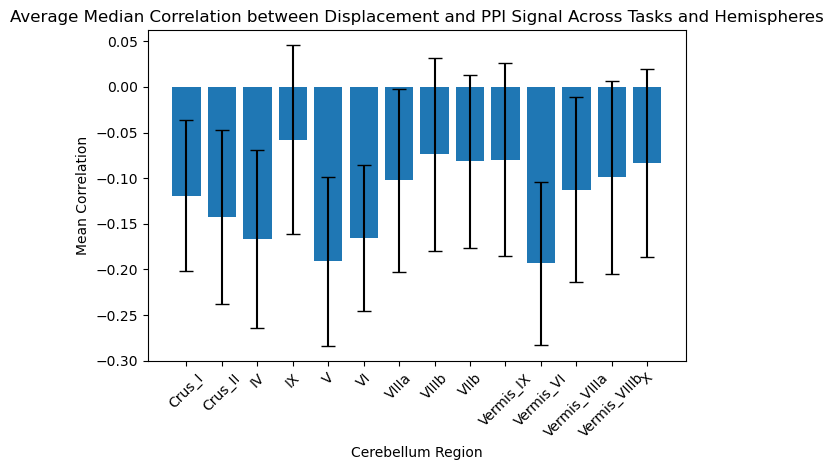

In [43]:
import warnings
warnings.filterwarnings("ignore")

# Initialize a dataframe to store the results
results = []
for cb in cb_regions: 
    for task in tasks: 
        for hemi in hemispheres: 
            for sub in subjects: 
                displacement_files = glob(displacement_path.format(sub=sub) + f"sub-{sub}_task-{task}_*_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv") 
                
                # Calculate average displacement for this subject and task 
                displacements = [] 
                for file in displacement_files: 
                    df = pd.read_csv(file, sep='\t') 
                    displacements.append(df['displacement'].median()) 
                avg_displacement = np.nanmean(displacements) 
                    
                # Load PPI signal 
                ppi_file = ppi_signal_path.format(task=task) + f"sub-{sub}_task-{task}_eye-{hemi}_hemi-{hemi}_cb-{cb}.txt"
                if os.path.exists(ppi_file): 
                    ppi_signal = np.loadtxt(ppi_file) 
                    
                    # Store the data 
                    results.append({ 
                        'cb': cb, 
                        'task': task, 
                        'hemi': hemi, 
                        'sub': sub, 
                        'avg_displacement': avg_displacement, 
                        'ppi_signal': ppi_signal 
                    }) 
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Debugging: Print the first few rows of the results dataframe
print("Results dataframe:")
print(results_df.head())

# Function to calculate correlation
def calculate_correlation(group):
    valid_data = group.dropna(subset=['avg_displacement', 'ppi_signal'])
    if len(valid_data) > 1:
        return pearsonr(valid_data['avg_displacement'], valid_data['ppi_signal'])[0]
    else:
        return np.nan

# Group by cerebellum region and calculate correlations across all tasks and hemispheres
correlations = results_df.groupby(['cb', 'sub']).apply(calculate_correlation).reset_index()
correlations.columns = ['cb', 'sub', 'correlation']

# Debugging: Print the correlations dataframe
print("Correlations dataframe:")
print(correlations.head())

# Calculate mean and standard error of correlations for each cerebellum region
mean_se = correlations.groupby('cb')['correlation'].agg(['mean', 'sem']).reset_index()
mean_se.columns = ['cb', 'mean_correlation', 'se_correlation']

# Debugging: Print the mean and standard error dataframe
print("Mean and SE dataframe:")
print(mean_se.head())

# Plot the data
fig, ax = plt.subplots()

# Create bar plot
bars = ax.bar(
    mean_se['cb'],
    mean_se['mean_correlation'],
    yerr=mean_se['se_correlation'],
    capsize=5
)

# Set plot title and labels
ax.set_title("Average Median Correlation between Displacement and PPI Signal Across Tasks and Hemispheres")
ax.set_xlabel("Cerebellum Region")
ax.set_ylabel("Median Correlation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()